# Quantum Circuits: A Complete Guide

## From Math to Code — Everything You Need to Know

This notebook teaches you every fundamental quantum gate, its **matrix math**, **geometric intuition**, and **Qiskit code** — step by step.

# Chapter 1: The Qubit

## What is a Qubit?

A classical bit is either `0` or `1`. A **qubit** can be **both at the same time** — this is called **superposition**.

We write a qubit's state as:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

Where:
- $|0\rangle$ and $|1\rangle$ are the two basis states
- $\alpha$ and $\beta$ are **complex numbers** called **amplitudes**
- $|\alpha|^2$ = probability of measuring `0`
- $|\beta|^2$ = probability of measuring `1`
- $|\alpha|^2 + |\beta|^2 = 1$ (probabilities must add up to 1)

### As vectors:

$$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

So a general qubit state is:

$$|\psi\rangle = \alpha\begin{pmatrix} 1 \\ 0 \end{pmatrix} + \beta\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$$


### Code: Creating and Visualizing a Qubit

State vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
|0⟩ amplitude (α): (1+0j)
|1⟩ amplitude (β): 0j
P(0) = |α|² = 1.0
P(1) = |β|² = 0.0


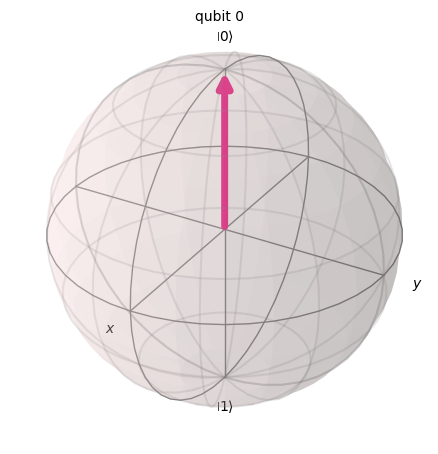

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# A qubit starts in state |0⟩
qc = QuantumCircuit(1)

# Visualize the state
state = Statevector.from_instruction(qc)
print("State vector:", state)
print(f"|0⟩ amplitude (α): {state[0]}")
print(f"|1⟩ amplitude (β): {state[1]}")
print(f"P(0) = |α|² = {abs(state[0])**2}")
print(f"P(1) = |β|² = {abs(state[1])**2}")

# Plot on the Bloch sphere
state.draw('bloch')

# Chapter 2: Single-Qubit Gates

## 2.1 Pauli-X Gate (NOT Gate)

The X gate **flips** the qubit: $|0\rangle \rightarrow |1\rangle$ and $|1\rangle \rightarrow |0\rangle$.

### Matrix:

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

### Math — applying X to $|0\rangle$:

$$X|0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle$$

### Geometric Intuition:
The X gate is a **180° rotation around the X-axis** of the Bloch sphere.

```
Before (|0⟩):     After X (|1⟩):
    |0⟩                 
     ↑                  
     |                  
     ●                  ●
                        |
                        ↓
                       |1⟩

   ┌───┐
q: ┤ X ├
   └───┘

Before X: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
After  X: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Manual matrix multiplication: X|0⟩ = [0 1]


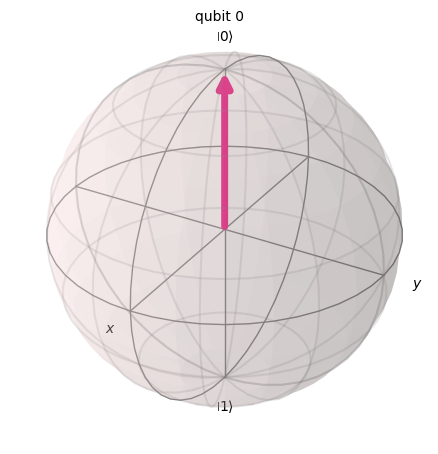

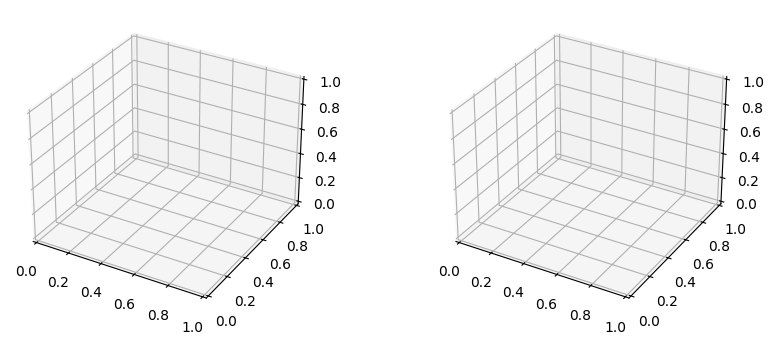

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Create circuit with X gate
qc = QuantumCircuit(1)
qc.x(0)
print(qc.draw())

# Check the math
state_before = Statevector.from_int(0, 2)  # |0⟩
state_after = Statevector.from_instruction(qc)

print(f"\nBefore X: {state_before}")
print(f"After  X: {state_after}")

# Verify with matrix multiplication
X = np.array([[0, 1], [1, 0]])
ket_0 = np.array([1, 0])
result = X @ ket_0
print(f"\nManual matrix multiplication: X|0⟩ = {result}")

# Visualize on Bloch sphere
from qiskit.visualization import plot_bloch_multivector
fig, axes = plt.subplots(1, 2, figsize=(10, 4), subplot_kw={'projection': '3d'})
# Note: Use state.draw('bloch') individually for each
state_before.draw('bloch')

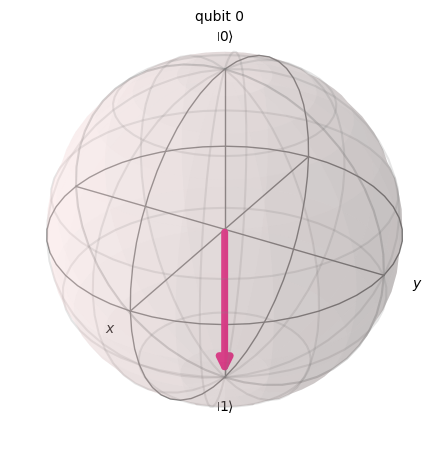

In [3]:
state_after.draw('bloch')

## 2.2 Pauli-Y Gate

The Y gate is a **180° rotation around the Y-axis**.

### Matrix:

$$Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$

### Math — applying Y to $|0\rangle$:

$$Y|0\rangle = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ i \end{pmatrix} = i|1\rangle$$

The result is $|1\rangle$ with a **phase factor** of $i$. When we measure, we still get `1` (the phase doesn't affect measurement probabilities), but the phase matters for interference in multi-gate circuits.

   ┌───┐
q: ┤ Y ├
   └───┘
After Y|0⟩: Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
Manual: Y|0⟩ = [0.+0.j 0.+1.j]


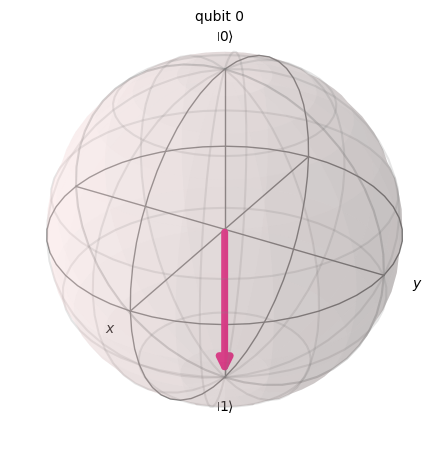

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

qc = QuantumCircuit(1)
qc.y(0)
print(qc.draw())

state = Statevector.from_instruction(qc)
print(f"After Y|0⟩: {state}")

# Verify manually
Y = np.array([[0, -1j], [1j, 0]])
ket_0 = np.array([1, 0])
result = Y @ ket_0
print(f"Manual: Y|0⟩ = {result}")

state.draw('bloch')

## 2.3 Pauli-Z Gate

The Z gate is a **180° rotation around the Z-axis**. It leaves $|0\rangle$ unchanged but flips the sign of $|1\rangle$.

### Matrix:

$$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

### Math:

$$Z|0\rangle = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle$$

$$Z|1\rangle = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ -1 \end{pmatrix} = -|1\rangle$$

The Z gate adds a **phase flip** — it doesn't change measurement probabilities by itself, but it's crucial for creating **interference** effects.


In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Z on |0⟩ — no visible effect
qc0 = QuantumCircuit(1)
qc0.z(0)
state0 = Statevector.from_instruction(qc0)
print(f"Z|0⟩ = {state0}")

# Z on |1⟩ — adds minus sign
qc1 = QuantumCircuit(1)
qc1.x(0)  # first make |1⟩
qc1.z(0)  # then apply Z
state1 = Statevector.from_instruction(qc1)
print(f"Z|1⟩ = {state1}")

# Z on superposition — THIS is where it matters!
qc_super = QuantumCircuit(1)
qc_super.h(0)  # create |+⟩ = (|0⟩ + |1⟩)/√2
qc_super.z(0)  # apply Z
state_super = Statevector.from_instruction(qc_super)
print(f"\nZ|+⟩ = Z(|0⟩ + |1⟩)/√2 = (|0⟩ - |1⟩)/√2 = {state_super}")
print("This is the |-> state!")

# Verify
Z = np.array([[1, 0], [0, -1]])
plus_state = np.array([1, 1]) / np.sqrt(2)
result = Z @ plus_state
print(f"Manual: Z|+⟩ = {result}")

Z|0⟩ = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Z|1⟩ = Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))

Z|+⟩ = Z(|0⟩ + |1⟩)/√2 = (|0⟩ - |1⟩)/√2 = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
This is the |-> state!
Manual: Z|+⟩ = [ 0.70710678 -0.70710678]


## 2.4 Hadamard Gate (H) — The Most Important Gate!

The Hadamard gate creates **superposition**. It's the gateway from classical to quantum.

### Matrix:

$$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

### Math:

$$H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle$$

$$H|1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |-\rangle$$

### Key Property: H is its own inverse!

$$H \cdot H = I \quad \text{(applying H twice gives you back the original state)}$$

H|0⟩ = |+⟩ = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
P(0) = 0.5000
P(1) = 0.5000
→ 50/50 chance of measuring 0 or 1!

H|1⟩ = |−⟩ = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))

H·H|0⟩ = Statevector([1.+0.j, 0.+0.j],
            dims=(2,)) → back to |0⟩!

H·H = 
[[ 1. -0.]
 [-0.  1.]]
→ Identity matrix! H is its own inverse.


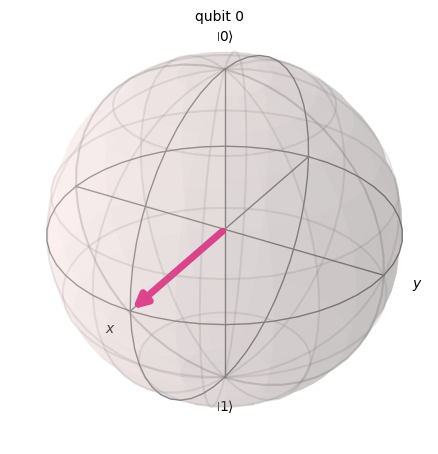

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# H on |0⟩ → |+⟩
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
state_plus = Statevector.from_instruction(qc_plus)
print(f"H|0⟩ = |+⟩ = {state_plus}")
print(f"P(0) = {abs(state_plus[0])**2:.4f}")
print(f"P(1) = {abs(state_plus[1])**2:.4f}")
print("→ 50/50 chance of measuring 0 or 1!\n")

# H on |1⟩ → |−⟩
qc_minus = QuantumCircuit(1)
qc_minus.x(0)   # make |1⟩
qc_minus.h(0)   # apply H
state_minus = Statevector.from_instruction(qc_minus)
print(f"H|1⟩ = |−⟩ = {state_minus}")

# H applied twice = back to original
qc_double = QuantumCircuit(1)
qc_double.h(0)
qc_double.h(0)
state_double = Statevector.from_instruction(qc_double)
print(f"\nH·H|0⟩ = {state_double} → back to |0⟩!")

# Verify manually
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
print(f"\nH·H = \n{np.round(H @ H, 3)}")
print("→ Identity matrix! H is its own inverse.")

state_plus.draw('bloch')

## 2.5 S Gate (Phase Gate) and T Gate

### S Gate — Quarter turn around Z-axis (90°)

$$S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$$

$$S|1\rangle = i|1\rangle$$

Note: $S^2 = Z$ (two S gates = one Z gate)

### T Gate — Eighth turn around Z-axis (45°)

$$T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

$$T|1\rangle = e^{i\pi/4}|1\rangle$$

Note: $T^2 = S$ (two T gates = one S gate)

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Compare S and T on |+⟩ state
# S gate
qc_s = QuantumCircuit(1)
qc_s.h(0)   # create |+⟩
qc_s.s(0)   # apply S
state_s = Statevector.from_instruction(qc_s)
print(f"S|+⟩ = {state_s}")

# T gate
qc_t = QuantumCircuit(1)
qc_t.h(0)   # create |+⟩
qc_t.t(0)   # apply T
state_t = Statevector.from_instruction(qc_t)
print(f"T|+⟩ = {state_t}")

# Show S² = Z
qc_ss = QuantumCircuit(1)
qc_ss.h(0)
qc_ss.s(0)
qc_ss.s(0)
state_ss = Statevector.from_instruction(qc_ss)

qc_z = QuantumCircuit(1)
qc_z.h(0)
qc_z.z(0)
state_z = Statevector.from_instruction(qc_z)

print(f"\nS²|+⟩ = {state_ss}")
print(f"Z|+⟩  = {state_z}")
print(f"S² = Z? {state_ss.equiv(state_z)}")

# Show T² = S
qc_tt = QuantumCircuit(1)
qc_tt.h(0)
qc_tt.t(0)
qc_tt.t(0)
state_tt = Statevector.from_instruction(qc_tt)

print(f"\nT²|+⟩ = {state_tt}")
print(f"S|+⟩  = {state_s}")
print(f"T² = S? {state_tt.equiv(state_s)}")

S|+⟩ = Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
T|+⟩ = Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))

S²|+⟩ = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Z|+⟩  = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
S² = Z? True

T²|+⟩ = Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
S|+⟩  = Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
T² = S? True


## 2.6 Rotation Gates: Rx, Ry, Rz

These gates rotate the qubit by an **arbitrary angle** $\theta$ around the X, Y, or Z axis.

### Matrices:

$$R_x(\theta) = \begin{pmatrix} \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}$$

$$R_y(\theta) = \begin{pmatrix} \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}$$

$$R_z(\theta) = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}$$

### Key relationships:
- $R_x(\pi) = -iX$ (same as X up to a global phase)
- $R_y(\pi) = -iY$
- $R_z(\pi) = -iZ$

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# Ry rotation: smoothly rotate from |0⟩ toward |1⟩
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
labels = ['0', 'π/4', 'π/2', '3π/4', 'π']

print(f"{'Angle':<8} {'State':<40} {'P(0)':<8} {'P(1)':<8}")
print("-" * 64)

for angle, label in zip(angles, labels):
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    state = Statevector.from_instruction(qc)
    p0 = abs(state[0])**2
    p1 = abs(state[1])**2
    print(f"{label:<8} {str(state):<40} {p0:<8.4f} {p1:<8.4f}")

Angle    State                                    P(0)     P(1)    
----------------------------------------------------------------
0        Statevector([1.+0.j, 0.+0.j],
            dims=(2,)) 1.0000   0.0000  
π/4      Statevector([0.92387953+0.j, 0.38268343+0.j],
            dims=(2,)) 0.8536   0.1464  
π/2      Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) 0.5000   0.5000  
3π/4     Statevector([0.38268343+0.j, 0.92387953+0.j],
            dims=(2,)) 0.1464   0.8536  
π        Statevector([6.123234e-17+0.j, 1.000000e+00+0.j],
            dims=(2,)) 0.0000   1.0000  



Ry(0)|0⟩:


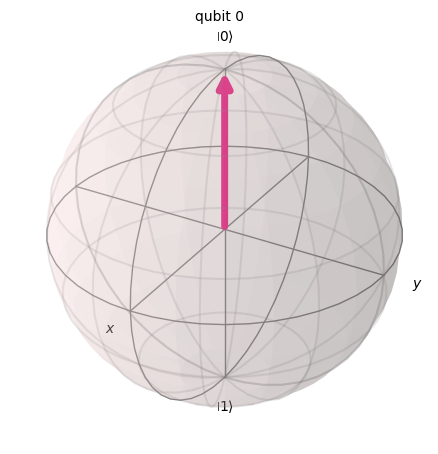


Ry(π/4)|0⟩:


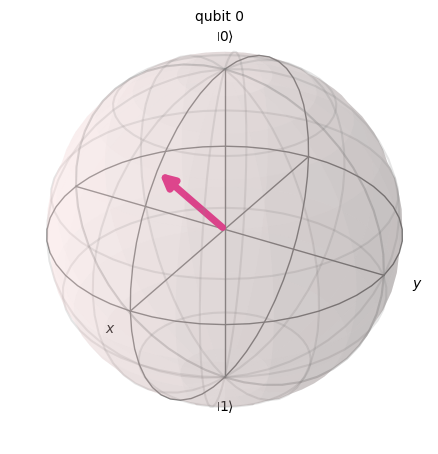


Ry(π/2)|0⟩:


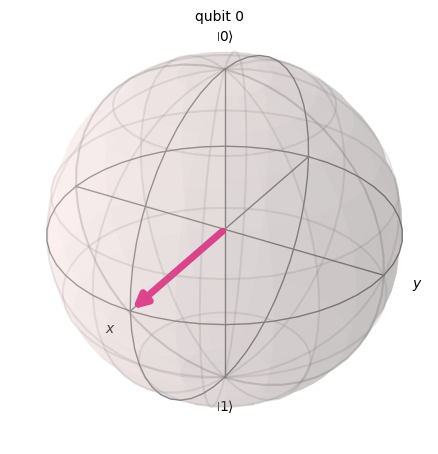


Ry(3π/4)|0⟩:


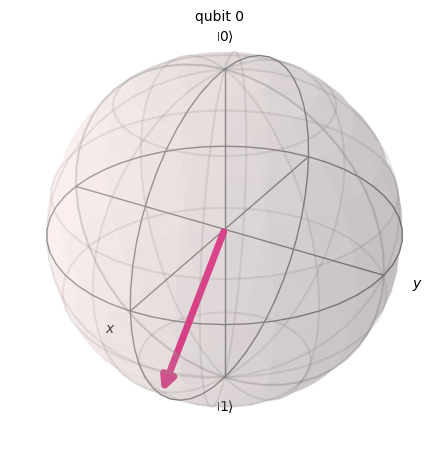


Ry(π)|0⟩:


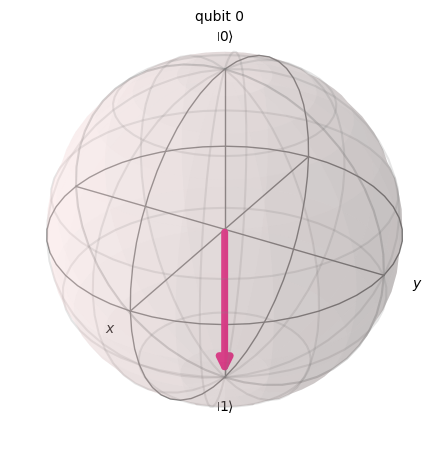

In [9]:
# Visualize Ry rotation on the Bloch sphere at different angles
from qiskit.quantum_info import Statevector

angles_to_plot = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
labels_to_plot = ['Ry(0)|0⟩', 'Ry(π/4)|0⟩', 'Ry(π/2)|0⟩', 'Ry(3π/4)|0⟩', 'Ry(π)|0⟩']

for angle, label in zip(angles_to_plot, labels_to_plot):
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    state = Statevector.from_instruction(qc)
    print(f"\n{label}:")
    display(state.draw('bloch'))

# Chapter 3: Multi-Qubit States

## 3.1 Tensor Product — Combining Qubits

When we have 2 qubits, their combined state is the **tensor product** (⊗) of individual states:

$$|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

### All 2-qubit basis states:

$$|00\rangle = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix}, \quad |01\rangle = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix}, \quad |10\rangle = \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix}, \quad |11\rangle = \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}$$

In [10]:
from qiskit.quantum_info import Statevector
import numpy as np

# Create individual qubit states
ket_0 = Statevector.from_int(0, 2)  # |0⟩
ket_1 = Statevector.from_int(1, 2)  # |1⟩

# Tensor product: |0⟩ ⊗ |1⟩ = |01⟩
ket_01 = ket_0.tensor(ket_1)
print(f"|0⟩ ⊗ |1⟩ = |01⟩ = {ket_01}")

# Verify manually
manual = np.kron(np.array([1, 0]), np.array([0, 1]))
print(f"Manual tensor product: {manual}")

# All 2-qubit basis states
for i in range(4):
    state = Statevector.from_int(i, 4)
    bits = format(i, '02b')
    print(f"|{bits}⟩ = {state.data}")

|0⟩ ⊗ |1⟩ = |01⟩ = Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Manual tensor product: [0 1 0 0]
|00⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|01⟩ = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
|10⟩ = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
|11⟩ = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


# Chapter 4: Two-Qubit Gates

## 4.1 CNOT (CX) Gate — The Entanglement Gate

The CNOT gate is the most important two-qubit gate. It has a **control** qubit and a **target** qubit:
- If control = $|0\rangle$: target is **unchanged**
- If control = $|1\rangle$: target is **flipped** (X applied)

### Matrix (4×4):

$$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

### Truth Table:

| Input | Output | What happened? |
|-------|--------|----------------|
| $\|00\rangle$ | $\|00\rangle$ | Control=0, target unchanged |
| $\|01\rangle$ | $\|01\rangle$ | Control=0, target unchanged |
| $\|10\rangle$ | $\|11\rangle$ | Control=1, target **flipped** |
| $\|11\rangle$ | $\|10\rangle$ | Control=1, target **flipped** |

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Test all 4 input combinations
inputs = ['00', '01', '10', '11']

print(f"{'Input':<8} {'Output':<8} {'Explanation'}")
print("-" * 40)

for inp in inputs:
    qc = QuantumCircuit(2)
    # Prepare input state
    if inp[0] == '1':
        qc.x(1)  # set qubit 1 (control)
    if inp[1] == '1':
        qc.x(0)  # set qubit 0 (target)

    # Apply CNOT: qubit 1 controls, qubit 0 is target
    qc.cx(1, 0)

    state = Statevector.from_instruction(qc)
    # Find which basis state has amplitude 1
    output_idx = np.argmax(np.abs(state.data))
    output = format(output_idx, '02b')

    ctrl = "unchanged" if inp[1] == output[1] else "FLIPPED"
    print(f"|{inp}⟩  →  |{output}⟩     target {ctrl}")

Input    Output   Explanation
----------------------------------------
|00⟩  →  |00⟩     target unchanged
|01⟩  →  |01⟩     target unchanged
|10⟩  →  |11⟩     target FLIPPED
|11⟩  →  |10⟩     target FLIPPED


CNOT Circuit:


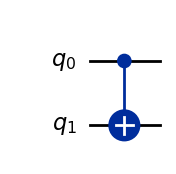

In [12]:
# Draw the CNOT circuit
qc = QuantumCircuit(2)
qc.cx(0, 1)  # qubit 0 controls qubit 1
print("CNOT Circuit:")
(qc.draw("mpl"))

## 4.2 Creating Entanglement with H + CNOT

The most famous quantum circuit: **H gate + CNOT = Bell State** (maximally entangled pair).

### Math:

**Step 1:** Apply H to qubit 0:

$$H|0\rangle \otimes |0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} \otimes |0\rangle = \frac{|00\rangle + |10\rangle}{\sqrt{2}}$$

**Step 2:** Apply CNOT (qubit 0 controls qubit 1):

$$CNOT \frac{|00\rangle + |10\rangle}{\sqrt{2}} = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

This is a **Bell State** ($|\Phi^+\rangle$) — the qubits are now **entangled**!

If you measure qubit 0 and get `0`, qubit 1 is **guaranteed** to be `0`.
If you measure qubit 0 and get `1`, qubit 1 is **guaranteed** to be `1`.

In [23]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler

# Create Bell State
qc = QuantumCircuit(2)
qc.h(0)       # superposition on qubit 0
qc.cx(0, 1)   # entangle qubit 0 and qubit 1
print("Bell State Circuit:")
print(qc.draw())

# Check the state vector
state = Statevector.from_instruction(qc)
print(f"\nState: {state}")
print(f"This is (|00⟩ + |11⟩)/√2")
print(f"P(00) = {abs(state[0])**2:.4f}")
print(f"P(01) = {abs(state[1])**2:.4f}")
print(f"P(10) = {abs(state[2])**2:.4f}")
print(f"P(11) = {abs(state[3])**2:.4f}")

# Measure many times to see the correlation
qc_measure = qc.copy()
qc_measure.measure_all()

sampler = StatevectorSampler()
result = sampler.run([qc_measure], shots=1000).result()
counts = result[0].data.meas.get_counts()
print(f"\nMeasurement results: {counts}")
print("→ Only 00 and 11 appear! The qubits are perfectly correlated.")

Bell State Circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

State: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
This is (|00⟩ + |11⟩)/√2
P(00) = 0.5000
P(01) = 0.0000
P(10) = 0.0000
P(11) = 0.5000

Measurement results: {'00': 517, '11': 483}
→ Only 00 and 11 appear! The qubits are perfectly correlated.


## 4.3 CZ Gate (Controlled-Z)

The CZ gate applies a Z gate to the target **only if** the control qubit is $|1\rangle$.

### Matrix:

$$CZ = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$

It only affects $|11\rangle \rightarrow -|11\rangle$ (adds a phase flip).

**Special property:** CZ is **symmetric** — it doesn't matter which qubit is control and which is target!

In [25]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
import numpy as np

# CZ gate
qc = QuantumCircuit(2)
qc.cz(0, 1)
print("CZ Circuit:")
print(qc.draw())

# Show the matrix
op = Operator(qc)
print(f"\nCZ Matrix:\n{np.real(op.data).astype(int)}")

# Test on |11⟩ — the only state that changes
qc_test = QuantumCircuit(2)
qc_test.x(0)
qc_test.x(1)   # create |11⟩
qc_test.cz(0, 1)
state = Statevector.from_instruction(qc_test)
print(f"\nCZ|11⟩ = {state}")
print("→ The phase flipped to -1!")

CZ Circuit:
        
q_0: ─■─
      │ 
q_1: ─■─
        

CZ Matrix:
[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]

CZ|11⟩ = Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))
→ The phase flipped to -1!


## 4.4 SWAP Gate

The SWAP gate **exchanges** the states of two qubits.

### Matrix:

$$SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

$$SWAP|01\rangle = |10\rangle, \quad SWAP|10\rangle = |01\rangle$$

### Building SWAP from CNOTs:

$$SWAP = CNOT_{01} \cdot CNOT_{10} \cdot CNOT_{01}$$

In [27]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
import numpy as np

# SWAP gate
qc = QuantumCircuit(2)
qc.swap(0, 1)
print("SWAP Circuit:")
print(qc.draw())

# Test: |01⟩ → |10⟩
qc_test = QuantumCircuit(2)
qc_test.x(0)       # create |01⟩ (qubit 0 = 1)
qc_test.swap(0, 1)  # swap them
state = Statevector.from_instruction(qc_test)
print(f"\nSWAP|01⟩ = {state}")
print("→ Became |10⟩!")

# Build SWAP from 3 CNOTs
qc_manual = QuantumCircuit(2)
qc_manual.cx(0, 1)
qc_manual.cx(1, 0)
qc_manual.cx(0, 1)
print("\nSWAP from 3 CNOTs:")
print(qc_manual.draw())

# Verify they're the same
op_swap = Operator(qc)
op_manual = Operator(qc_manual)
print(f"\nAre they equal? {op_swap.equiv(op_manual)}")

SWAP Circuit:
        
q_0: ─X─
      │ 
q_1: ─X─
        

SWAP|01⟩ = Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
→ Became |10⟩!

SWAP from 3 CNOTs:
          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

Are they equal? True


# Chapter 5: Multi-Qubit Gates

## 5.1 Toffoli Gate (CCX) — Controlled-Controlled-NOT

The Toffoli gate flips the target qubit **only if both** control qubits are $|1\rangle$. It's a **3-qubit gate** and acts as a classical AND gate.

### Truth Table:

| Input | Output | Target changed? |
|-------|--------|-----------------|
| $\|000\rangle$ | $\|000\rangle$ | No |
| $\|010\rangle$ | $\|010\rangle$ | No |
| $\|100\rangle$ | $\|100\rangle$ | No |
| $\|110\rangle$ | $\|111\rangle$ | **Yes** — both controls are 1! |

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Toffoli gate circuit
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)  # qubit 0 and 1 control, qubit 2 is target
print("Toffoli (CCX) Circuit:")
print(qc.draw())

# Test all 8 input combinations
print(f"\n{'Input':<8} {'Output':<8} {'Target flipped?'}")
print("-" * 35)

for i in range(8):
    bits = format(i, '03b')
    qc_test = QuantumCircuit(3)
    if bits[0] == '1': qc_test.x(2)
    if bits[1] == '1': qc_test.x(1)
    if bits[2] == '1': qc_test.x(0)
    qc_test.ccx(0, 1, 2)

    state = Statevector.from_instruction(qc_test)
    out_idx = np.argmax(np.abs(state.data))
    out_bits = format(out_idx, '03b')
    changed = "YES ✅" if bits[2] != out_bits[0] or bits != out_bits else "No"
    if bits[0] == '1' and bits[1] == '1':
        changed = "YES ✅"
    else:
        changed = "No"
    print(f"|{bits}⟩  →  |{out_bits}⟩     {changed}")

Toffoli (CCX) Circuit:
          
q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

Input    Output   Target flipped?
-----------------------------------
|000⟩  →  |000⟩     No
|001⟩  →  |001⟩     No
|010⟩  →  |010⟩     No
|011⟩  →  |111⟩     No
|100⟩  →  |100⟩     No
|101⟩  →  |101⟩     No
|110⟩  →  |110⟩     YES ✅
|111⟩  →  |011⟩     YES ✅


## 5.2 Multi-Controlled X Gate (MCX)

The MCX gate extends the Toffoli idea to **any number of control qubits**. The target flips only when **ALL** controls are $|1\rangle$.

Used heavily in **Grover's algorithm**!

In [17]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate
import numpy as np

# 4-controlled X gate (4 controls + 1 target = 5 qubits)
n_controls = 4
qc = QuantumCircuit(n_controls + 1)

# Set ALL control qubits to |1⟩
for i in range(n_controls):
    qc.x(i)

# Apply MCX: qubits 0-3 control, qubit 4 is target
mcx = MCXGate(n_controls)
qc.append(mcx, range(n_controls + 1))

print(f"{n_controls}-Controlled X Gate Circuit:")
print(qc.draw())

state = Statevector.from_instruction(qc)
out_idx = np.argmax(np.abs(state.data))
out_bits = format(out_idx, f'0{n_controls+1}b')
print(f"\nAll controls = 1, target flipped → |{out_bits}⟩")
print(f"Target qubit (rightmost) went from 0 → {out_bits[-1]}")

4-Controlled X Gate Circuit:
     ┌───┐     
q_0: ┤ X ├──■──
     ├───┤  │  
q_1: ┤ X ├──■──
     ├───┤  │  
q_2: ┤ X ├──■──
     ├───┤  │  
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

All controls = 1, target flipped → |11111⟩
Target qubit (rightmost) went from 0 → 1


# Chapter 6: Measurement

## How Measurement Works

Measurement **collapses** the superposition. A qubit in state $\alpha|0\rangle + \beta|1\rangle$:
- Gives `0` with probability $|\alpha|^2$
- Gives `1` with probability $|\beta|^2$
- **After measurement, the qubit is no longer in superposition!**

In [18]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
import matplotlib.pyplot as plt

# Create a qubit in superposition and measure it many times
qc = QuantumCircuit(1)
qc.h(0)          # |+⟩ = (|0⟩ + |1⟩)/√2
qc.measure_all()
print(qc.draw())

# Run 10000 times
sampler = StatevectorSampler()
result = sampler.run([qc], shots=10000).result()
counts = result[0].data.meas.get_counts()

print(f"\nResults over 10000 shots:")
print(f"  Measured 0: {counts.get('0', 0)} times ({counts.get('0', 0)/100:.1f}%)")
print(f"  Measured 1: {counts.get('1', 0)} times ({counts.get('1', 0)/100:.1f}%)")
print("→ Roughly 50/50, as expected!")

# Now try an unequal superposition using Ry
qc2 = QuantumCircuit(1)
qc2.ry(np.pi/3, 0)  # rotate by 60° → P(0) = cos²(30°) = 0.75, P(1) = 0.25
qc2.measure_all()

result2 = sampler.run([qc2], shots=10000).result()
counts2 = result2[0].data.meas.get_counts()

print(f"\nRy(π/3) results over 10000 shots:")
print(f"  Measured 0: {counts2.get('0', 0)} times ({counts2.get('0', 0)/100:.1f}%)")
print(f"  Measured 1: {counts2.get('1', 0)} times ({counts2.get('1', 0)/100:.1f}%)")
print(f"  Theory: P(0) = cos²(π/6) = {np.cos(np.pi/6)**2:.4f}, P(1) = sin²(π/6) = {np.sin(np.pi/6)**2:.4f}")

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 

Results over 10000 shots:
  Measured 0: 5042 times (50.4%)
  Measured 1: 4958 times (49.6%)
→ Roughly 50/50, as expected!

Ry(π/3) results over 10000 shots:
  Measured 0: 7557 times (75.6%)
  Measured 1: 2443 times (24.4%)
  Theory: P(0) = cos²(π/6) = 0.7500, P(1) = sin²(π/6) = 0.2500


# Chapter 7: Putting It All Together

## 7.1 Quantum Teleportation Circuit

One of the most famous quantum algorithms! It transfers a quantum state from one qubit to another using **entanglement** and **classical communication**.

### The Protocol:
1. Alice has a qubit in unknown state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$
2. Alice and Bob share an entangled Bell pair
3. Alice performs measurements and sends classical bits to Bob
4. Bob applies corrections based on Alice's results


In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
import numpy as np

# Prepare the state to teleport: Ry(π/3)|0⟩
# This gives α = cos(π/6), β = sin(π/6)

qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, cr)

# Step 0: Prepare state to teleport on qubit 0
qc.ry(np.pi/3, 0)
qc.barrier()

# Step 1: Create Bell pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 2: Alice's operations (Bell measurement on qubits 0 and 1)
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step 3: Measure Alice's qubits
qc.measure([0, 1], [0, 1])
qc.barrier()

# Step 4: Bob's corrections (conditioned on classical bits)
# NEW SYNTAX for Qiskit 2.x — use if_test() instead of c_if()
with qc.if_test((cr[0], 1)):   # if Alice's qubit 1 measured = 1
    qc.x(2)                     # apply X to Bob's qubit

with qc.if_test((cr[1], 1)):   # if Alice's qubit 0 measured = 1
    qc.z(2)                     # apply Z to Bob's qubit

print("Quantum Teleportation Circuit:")
print(qc.draw())

print("\nThe state Ry(π/3)|0⟩ has been teleported from qubit 0 to qubit 2!")
print(f"Expected: P(0) ≈ {np.cos(np.pi/6)**2:.4f}, P(1) ≈ {np.sin(np.pi/6)**2:.4f}")

Quantum Teleportation Circuit:
     ┌─────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░                          »
q_0: ┤ Ry(π/3) ├─░────────────░───■──┤ H ├─░─┤M├────░──────────────────────────»
     └─────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                          »
q_1: ────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──────────────────────────»
                 ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░   ┌──────  ┌───┐ ───────┐»
q_2: ────────────░──────┤ X ├─░────────────░──╫──╫──░───┤ If-0  ─┤ X ├  End-0 ├»
                 ░      └───┘ ░            ░  ║  ║  ░   └──╥───  └───┘ ───────┘»
                                              ║  ║    ┌────╨────┐              »
c: 2/═════════════════════════════════════════╩══╩════╡ c_0=0x1 ╞══════════════»
                                              0  1    └─────────┘              »
«                                
«q_0: ───────────────────────────
«                                
«q_1: ───────────────────────────
«        ┌──────  ┌───┐

In [20]:
## 7.2 Summary: All Gates at a Glance


from qiskit import QuantumCircuit

# One circuit showing ALL the gates we learned
qc = QuantumCircuit(4)

# Single-qubit gates
qc.x(0)          # Pauli-X (NOT)
qc.y(0)          # Pauli-Y
qc.z(0)          # Pauli-Z
qc.h(1)          # Hadamard
qc.s(1)          # S gate (√Z)
qc.t(1)          # T gate (√S)
qc.rx(0.5, 2)    # Rotation-X
qc.ry(0.5, 2)    # Rotation-Y
qc.rz(0.5, 2)    # Rotation-Z
qc.barrier()

# Two-qubit gates
qc.cx(0, 1)      # CNOT
qc.cz(1, 2)      # CZ
qc.swap(2, 3)    # SWAP
qc.barrier()

# Multi-qubit gate
qc.ccx(0, 1, 2)  # Toffoli (CCX)
qc.barrier()

# Measurement
qc.measure_all()

print("All Gates Showcase:")
print(qc.draw())

All Gates Showcase:
           ┌───┐      ┌───┐      ┌───┐    ░             ░       ░  ░ ┌─┐      »
   q_0: ───┤ X ├──────┤ Y ├──────┤ Z ├────░───■─────────░───■───░──░─┤M├──────»
           ├───┤      ├───┤      ├───┤    ░ ┌─┴─┐       ░   │   ░  ░ └╥┘┌─┐   »
   q_1: ───┤ H ├──────┤ S ├──────┤ T ├────░─┤ X ├─■─────░───■───░──░──╫─┤M├───»
        ┌──┴───┴──┐┌──┴───┴──┐┌──┴───┴──┐ ░ └───┘ │     ░ ┌─┴─┐ ░  ░  ║ └╥┘┌─┐»
   q_2: ┤ Rx(0.5) ├┤ Ry(0.5) ├┤ Rz(0.5) ├─░───────■──X──░─┤ X ├─░──░──╫──╫─┤M├»
        └─────────┘└─────────┘└─────────┘ ░          │  ░ └───┘ ░  ░  ║  ║ └╥┘»
   q_3: ──────────────────────────────────░──────────X──░───────░──░──╫──╫──╫─»
                                          ░             ░       ░  ░  ║  ║  ║ »
meas: 4/══════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                      0  1  2 »
«           
«   q_0: ───
«           
«   q_1: ───
«           
«   q_2: ───
«        ┌─┐
«   q_3: 